# The Brief

The brief is to create an algorithm that takes a data set and outputs the probabilty of each person to survive or die.

---

# The beginning
The first thing with any file is the reading of the data. 
For the ease of manipulation we will use pandas. So let's import it and name it pd for ease of use.

In [1]:
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
pd.__version__
np.__version__

'1.18.4'

In this competition I decide only to use the documentation from the official websites, and not to look on any other person's code from the competition. Hopefully this is a good way to find my strengths and weaknessess rather than copy and paste code around (or hack it). 

There is value in both, but in this exercise I am looking to discover my own limits.

From the start, a great resource that I found was the *Pandas_Cheat_Sheet.pdf* from https://pandas.pydata.org which helped a ton.

# Reading the data
Let's start by bringing in the data from the .csv

In [2]:
trainingData = pd.read_csv('./Data/train.csv')

Let's now see what is inside the training Data

In [3]:
trainingData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


As we can see, the training data is made up of 12 columns with 891 rows.

# Initial tests 
To understand the nature of the data, we would usuall perform a bunch of routine tests and procedures.

The first comand I will be using is trainingData.head(). This will show us the "head" or simply the top rows and columns of the information

In [4]:
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trainingData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data Key
From Kaggle we know that each information means this  

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

---

The second command is dtypes which is short for data types.

This shows you what type of data types are within each column.

As we can see from the information and the 

In [6]:
trainingData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
trainingData.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
trainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A good fast test is do use describe, to get an "off the bat" statistical representation of your numerical data. Afterwards, to understand the accuracy I wanted to know how much of the above information is missing from the dataset. By performing count, I quickly found out that there are some gaps in the age information, cabin number and embarked status. 

In [9]:
trainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As we can see from the above,
- 38.3% of the passengers survived
- 

# Cleaning the data

First thing I observed was that passenger id's were a useless information as it was doubling up on the pandas indexing. Thus we can remove this column of information

# Analysis

## First thoughts

The first thing I wanted to test for was the corelation between sex and the other information, as in this case it is registered as a binary male/female thus easy to observe. I initially went the long way about it, but then subsequently discovered 2 additional optinal ways of analysing it. 

### The long winded way

In [22]:
i=0
TotalSumMale = 0
numberMale = 0

TotalSumFemale = 0
numberFemale = 0

for a in trainingData.Sex.array:
    if a == "male":
        TotalSumMale += trainingData.Survived[i]
        numberMale += 1
    elif a == "female":
        TotalSumFemale += trainingData.Survived[i]
        numberFemale += 1
    i+=1
print ("Male Chance of surving " + str(TotalSumMale/numberMale*100) +"%")
print ("Female Chance of surving " + str(TotalSumFemale/numberFemale*100)+"%")
print ("Chance of surving: " + str(trainingData.Survived.mean()*100))

Male Chance of surving 18.890814558058924%
Female Chance of surving 74.20382165605095%
Chance of surving: 38.38383838383838


### The less long winded way

But then I found a much sleeker way of solving it by using the function *loc*. Not only does it take less space but furthermore it also opens wonderful possibilities to analyse the numerical data.

In [11]:
print ("Female Stats:")
print (trainingData.loc[trainingData.Sex == "female"].describe())
print ()

print ("Male Stats:")
print (trainingData.loc[trainingData.Sex == "male"].describe())

Female Stats:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   314.000000  314.000000  314.000000  261.000000  314.000000   
mean    431.028662    0.742038    2.159236   27.915709    0.694268   
std     256.846324    0.438211    0.857290   14.110146    1.156520   
min       2.000000    0.000000    1.000000    0.750000    0.000000   
25%     231.750000    0.000000    1.000000   18.000000    0.000000   
50%     414.500000    1.000000    2.000000   27.000000    0.000000   
75%     641.250000    1.000000    3.000000   37.000000    1.000000   
max     889.000000    1.000000    3.000000   63.000000    8.000000   

            Parch        Fare  
count  314.000000  314.000000  
mean     0.649682   44.479818  
std      1.022846   57.997698  
min      0.000000    6.750000  
25%      0.000000   12.071875  
50%      0.000000   23.000000  
75%      1.000000   55.000000  
max      6.000000  512.329200  

Male Stats:
       PassengerId    Survived      Pclass         Age

### The final method 

The beest method I found at this point was to use the grouping function. The output is tidy and easier to compare, which makes it easier for me to understand what is going on

In [47]:
trainingData.groupby("Sex").describe()

PassengerId                                                             \
             count        mean         std  min     25%    50%     75%    max   
Sex                                                                             
female       314.0  431.028662  256.846324  2.0  231.75  414.5  641.25  889.0   
male         577.0  454.147314  257.486139  1.0  222.00  464.0  680.00  891.0   

       Survived            ... Parch        Fare                              \
          count      mean  ...   75%  max  count       mean        std   min   
Sex                        ...                                                 
female    314.0  0.742038  ...   1.0  6.0  314.0  44.479818  57.997698  6.75   
male      577.0  0.188908  ...   0.0  5.0  577.0  25.523893  43.138263  0.00   

                                          
              25%   50%    75%       max  
Sex                                       
female  12.071875  23.0  55.00  512.3292  
male     7.895800  10.5  26.55  512.3292  

[2 rows x 56 columns]

The first thing that looked interesting was the hihg ratio of males to females

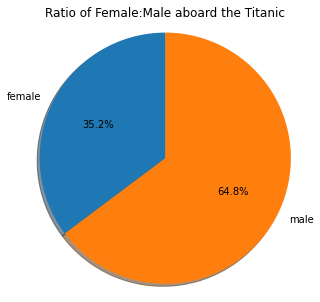

In [120]:
SGroup = trainingData.groupby("Sex")

tmp = SGroup.size().array # Tidy way of extracting the distribution
labels = SGroup.groups.keys() # Tidy way of extracting the group keys


fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(tmp,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Ratio of Female:Male aboard the Titanic")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

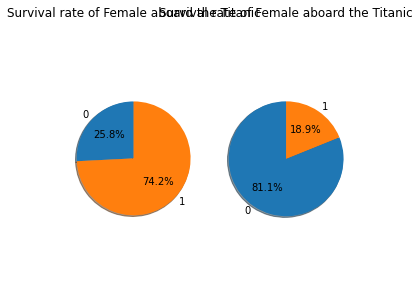

In [127]:
FGSurvived = trainingData.loc[trainingData.Sex == 'female'].groupby("Survived")
MGSurvived = trainingData.loc[trainingData.Sex == 'male'].groupby("Survived")
tmp = FGSurvived.size().array # Tidy way of extracting the distribution
labels = FGSurvived.groups.keys() # Tidy way of extracting the group keys

fig1, ax1 = plt.subplots(1,2,figsize=(5, 5))
ax1[0].set_title("Survival rate of Female aboard the Titanic")
ax1[0].pie(tmp, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].axis('equal')

tmp = MGSurvived.size().array # Tidy way of extracting the distribution
ax1[1].set_title("Survival rate of Female aboard the Titanic")
ax1[1].pie(tmp, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()